# __1. Import and Dataset Overview__

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

# Data Visualization
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px

# Scientific Calculation
from scipy import stats

# Data Modeling
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('./CarPrice.csv')

In [3]:
raw_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
raw_data.shape

(205, 26)

In [5]:
raw_data['CarName'].nunique()

147

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
raw_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# __2. Data Preperation__

In [8]:
data = raw_data.copy(deep=True)

In [9]:
data.columns = data.columns.str.lower()

In [10]:
data['carname'] = data['carname'].str.split(' ',expand=True)[0]

In [11]:
data['carname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
data['carname'].replace(
    to_replace=['alfa-romero', 'maxda', 'Nissan' ,'porcshce', 'toyouta', 'vokswagen'], 
    value=['alfa-romeo', 'mazda', 'nissan', 'porsche', 'toyota', 'volkswagen'],
    inplace=True
)
data['carname'].replace(
    to_replace='vw',
    value='volkswagen',
    inplace=True
)
data['carname'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
data['carname'].nunique()

22

## __Finding missing values__

In [14]:
if data.isnull().any() is True:
    print(data.isnull().sum())
else:
    print('There is no missing values present in this dataset.')

There is no missing values present in this dataset.


## __Finding duplicate values__

In [15]:
if data.duplicated().any() is True:
    print(data.duplicated().sum())
else :
    print('There is no duplicated values present in this dataset.')

There is no duplicated values present in this dataset.


In [16]:
data[data.duplicated()]

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [17]:
data.columns

Index(['car_id', 'symboling', 'carname', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# __3. Data Exploration__

In [18]:
numcols = data.select_dtypes(include=np.number).columns
objcols = data.select_dtypes(include='object').columns

In [19]:
data.corr()['price']

car_id             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

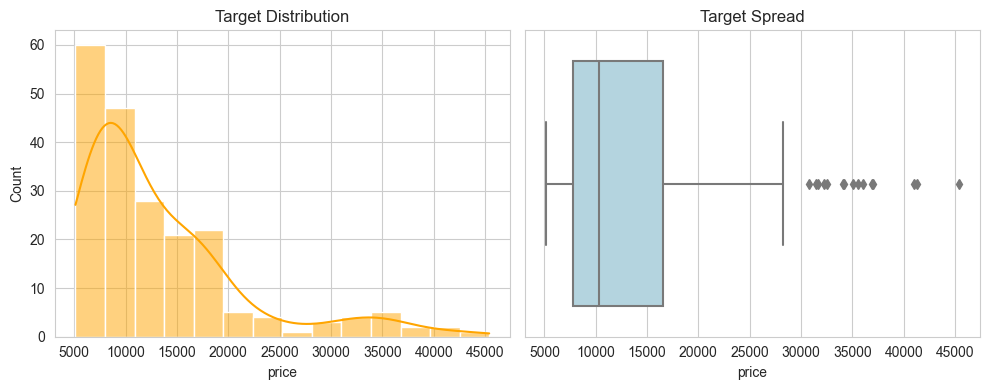

In [20]:
sns.set_style('whitegrid')
fig,[ax0, ax1] = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
sns.histplot(data=data, x='price',  kde=True, color='orange', ax=ax0)
sns.boxplot(data=data, x='price', color='lightblue', ax=ax1)
ax0.set_title('Target Distribution')
ax1.set_title('Target Spread')
plt.tight_layout()
plt.show()

- __Looking at the distrbuition of the price is rightly skewed.__
- __There are some outliers present in this data, but we can't remove it so we will handle it in scaling.__

## __Exploring Categorical Features__

In [21]:
objcols

Index(['carname', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

Text(0.5, 1.0, 'Which company car ')

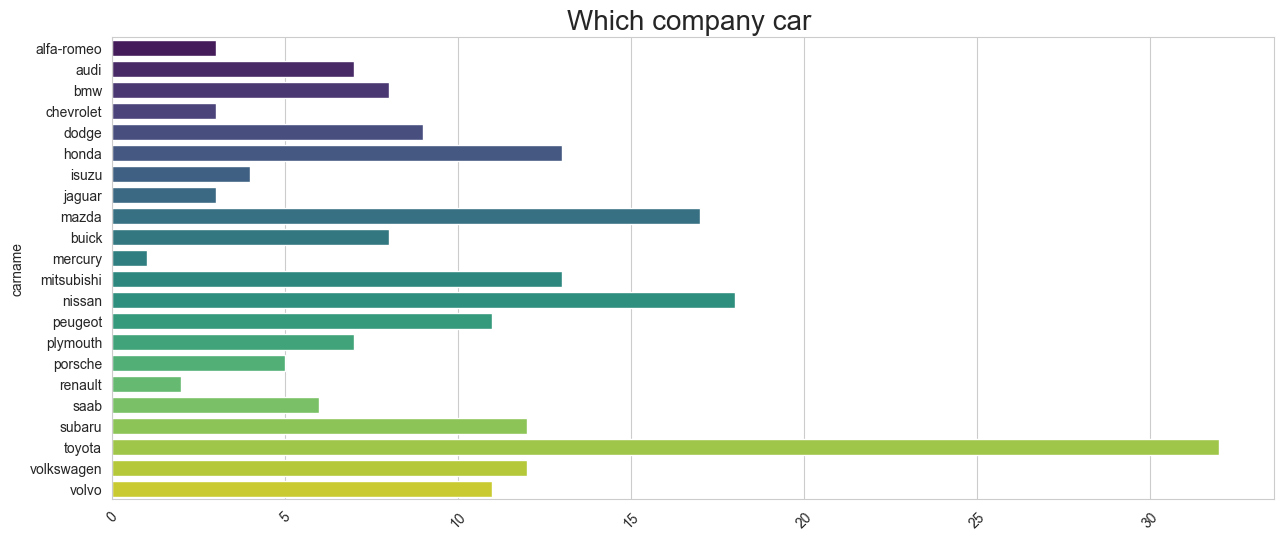

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, y='carname', palette='viridis')
plt.xlabel('')
plt.xticks(rotation=45)
plt.title('Which company car ', size=20)

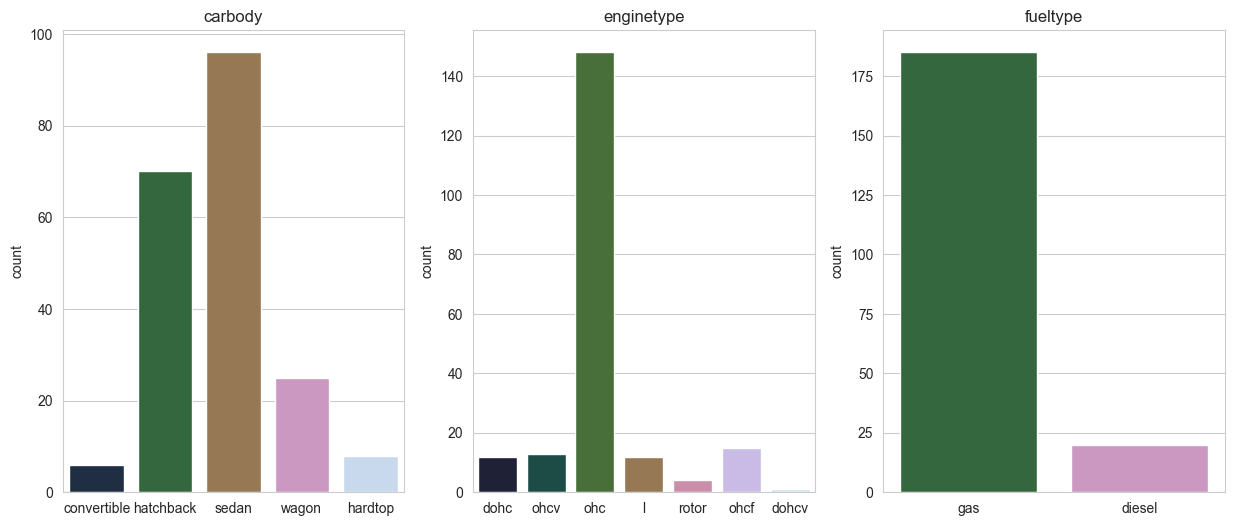

In [23]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,6))
axes = axes.flat
types = ['carbody', 'enginetype', 'fueltype']
for index, column in enumerate(types):
    graph = sns.countplot(
        data=data,
        x=column,
        palette='cubehelix',
        ax=axes[index]
    )
    axes[index].set_xlabel('')
    axes[index].set_title(f'{column}', size=12)

<AxesSubplot: ylabel='fueltype'>

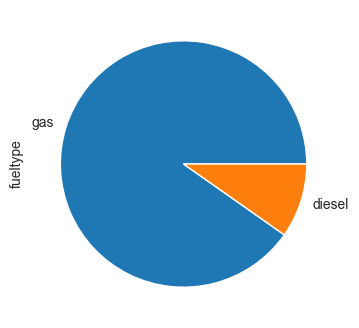

In [24]:
data['fueltype'].value_counts().plot.pie(y='fueltype', figsize=(6,4))

- sedan is most boughted car body type.
- gas is the most boughted fuel type.

In [25]:
objcols

Index(['carname', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

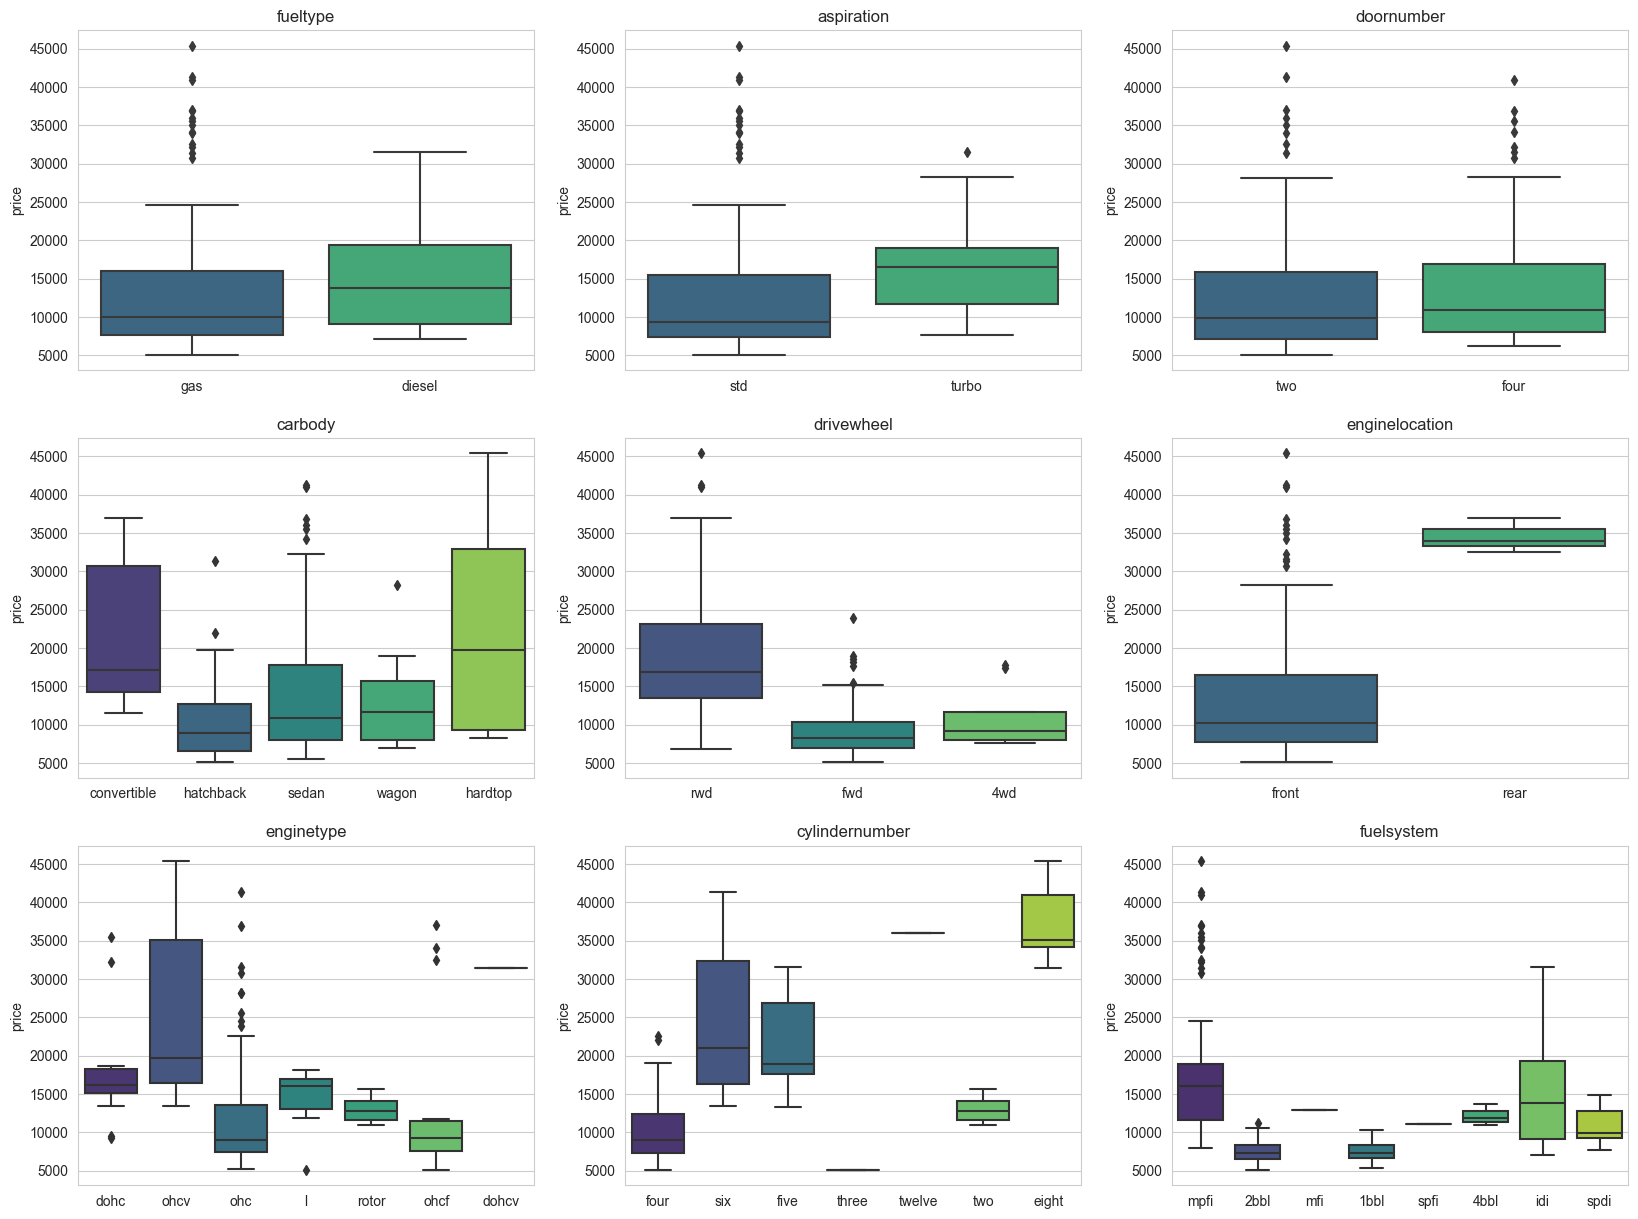

In [26]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20,15))
axes = axes.flat
features =['fueltype', 'aspiration', 'doornumber', 'carbody',
        'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
        'fuelsystem']
for index, column in enumerate(features):
    graph = sns.boxplot(
        data=data,
        x=column,
        y='price',
        palette='viridis',
        ax=axes[index]
    )
    axes[index].set_xlabel('')
    axes[index].set_title(f'{column}', size=12)

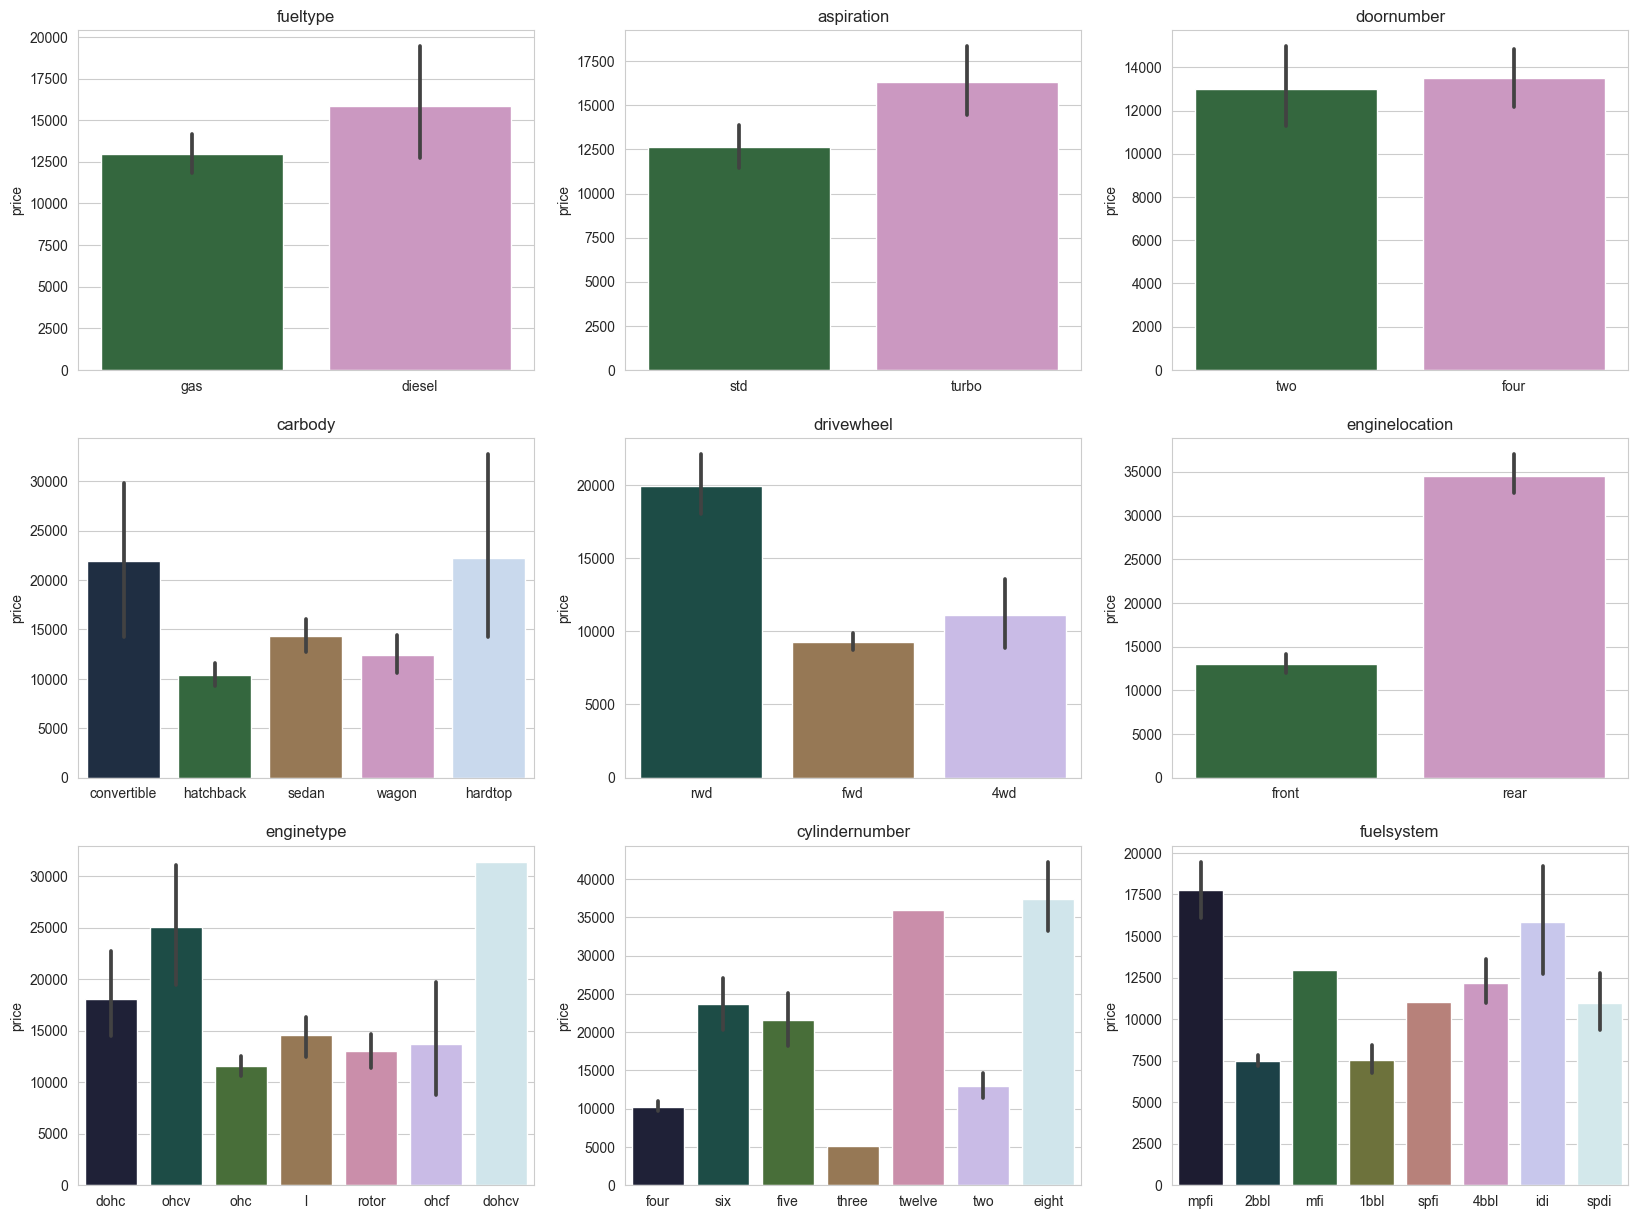

In [27]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20,15))
axes = axes.flat
features =['fueltype', 'aspiration', 'doornumber', 'carbody',
        'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
        'fuelsystem']
for index, column in enumerate(features):
    graph = sns.barplot(
        data=data,
        x=column,
        y='price',
        palette='cubehelix',
        ax=axes[index]
    )
    axes[index].set_xlabel('')
    axes[index].set_title(f'{column}', size=12)

In [28]:
data[numcols].corr()['price'].sort_values(ascending=True)

highwaympg         -0.697599
citympg            -0.685751
car_id             -0.109093
peakrpm            -0.085267
symboling          -0.079978
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

In [29]:
numcols

Index(['car_id', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

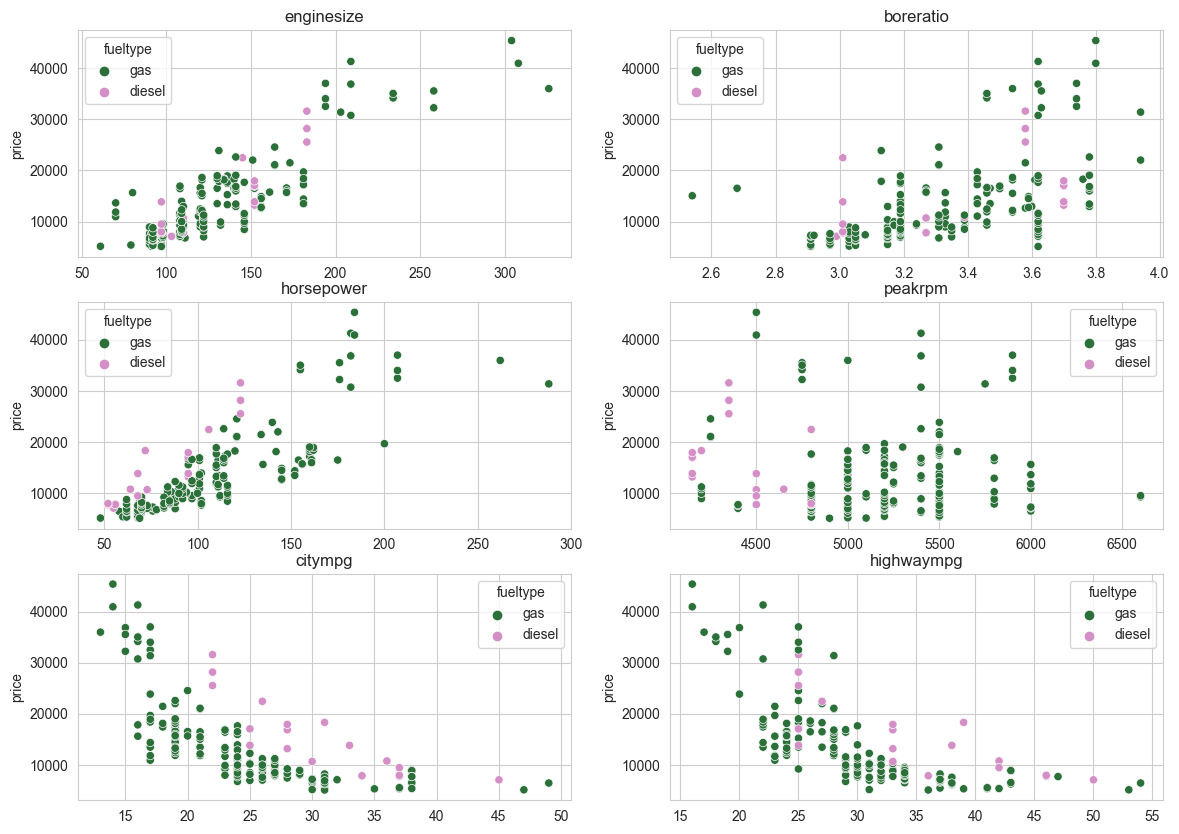

In [30]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(14,10))
axes = axes.flat
measurement_colums = ['enginesize', 'boreratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
for index, column in enumerate(measurement_colums):
    graph = sns.scatterplot(
        data=data,
        x=column,
        y='price',
        hue='fueltype',
        palette='cubehelix',
        ax=axes[index]
    )
    axes[index].set_xlabel('')
    axes[index].set_title(f'{column}', size=12)

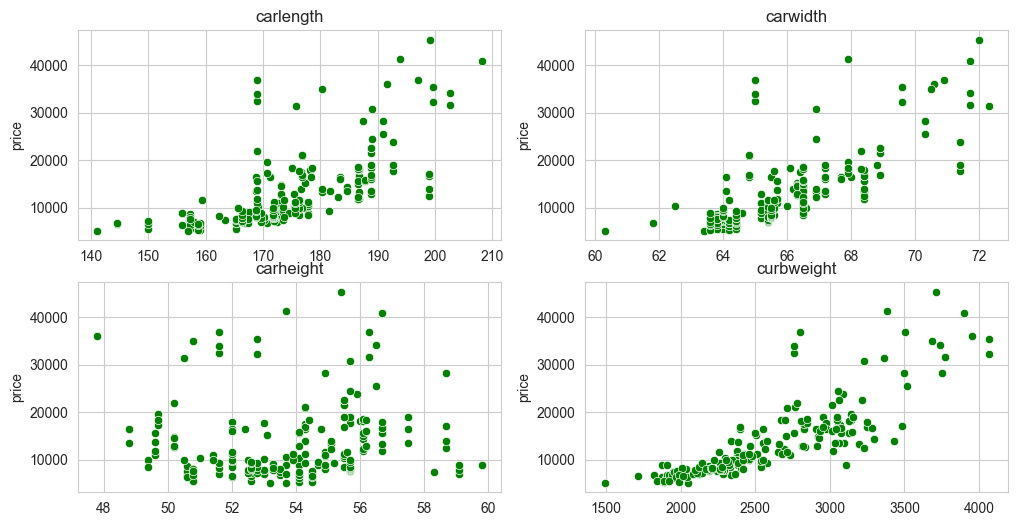

In [31]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,6))
axes = axes.flat
measurement_colums = ['carlength', 'carwidth', 'carheight', 'curbweight']
for index, column in enumerate(measurement_colums):
    graph = sns.scatterplot(
        data=data,
        x=column,
        y='price',
        color='green',
        ax=axes[index]
    )
    axes[index].set_xlabel('')
    axes[index].set_title(f'{column}', size=12)

<AxesSubplot: >

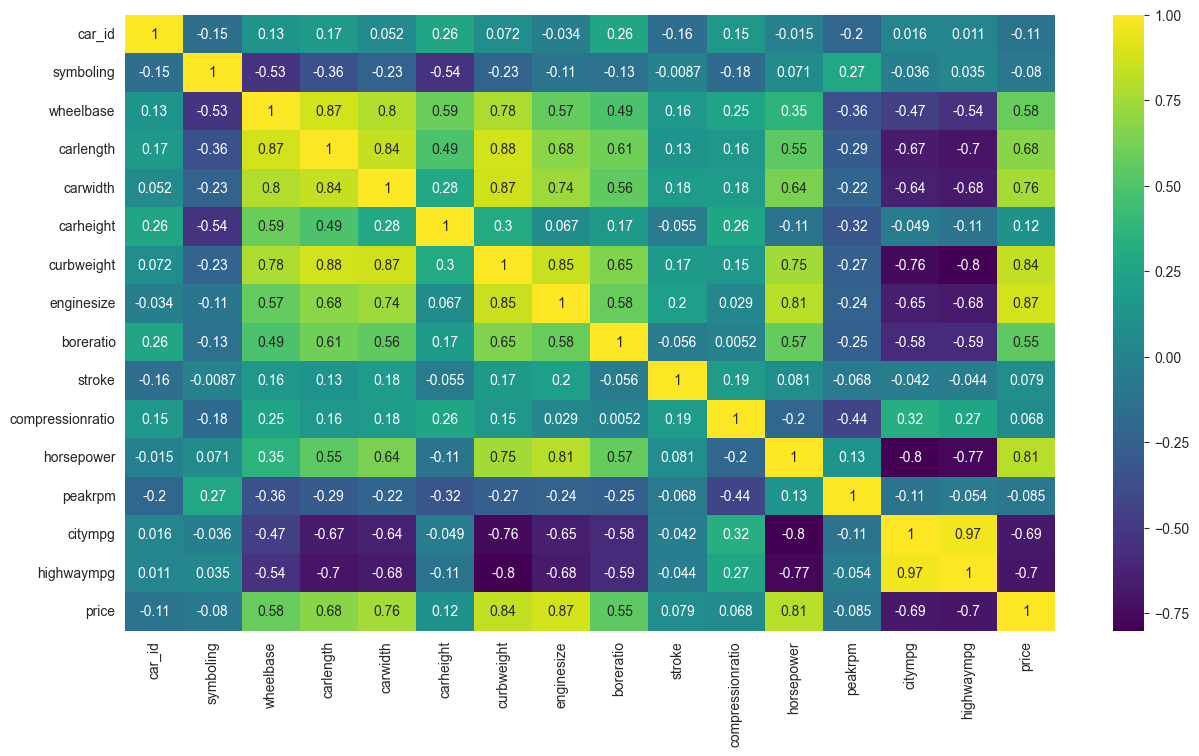

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap='viridis', annot=True)

# __4. Feature Engineering__

## __4.1 Removing unwanted columns__

In [33]:
data.columns

Index(['car_id', 'symboling', 'carname', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [34]:
data.drop(
    columns=['car_id'],
    inplace=True)

In [35]:
from sklearn.preprocessing import OrdinalEncoder #only on series
encode = OrdinalEncoder()
data[objcols] = encode.fit_transform(data[objcols].values)

In [36]:
data.corr()['price']

symboling          -0.079978
carname            -0.262234
fueltype           -0.105679
aspiration          0.177926
doornumber         -0.031835
carbody            -0.083976
drivewheel          0.577992
enginelocation      0.324973
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginetype          0.049171
cylindernumber     -0.027628
enginesize          0.874145
fuelsystem          0.526823
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

# __5. Building the model__

## __5.1 Determine Features & Target Variables__

In [37]:
features = data.drop(columns=['price'])
target = data['price']

## __5.2 Split the dataset into Traing and Test sets__

In [38]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(features, target, train_size=0.8, random_state = True)

In [39]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (164, 24)
xtest shape:  (41, 24)
ytrain shape:  (164,)
ytest shape:  (41,)


## __5.3 Scale data using StandardScaler__

In [40]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(xtrain)
xtrain = scale.transform(xtrain)
xtest = scale.transform(xtest)

## __5.4 Train the Model__

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
model = LinearRegression()
best_fit = model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [42]:
# building the model

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

def select_model_predict(model):
    
    # Training the model
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    #Checking Bias-variance tradeoff
    train_accuracy = model.score(xtrain, ytrain)
    test_accuracy = model.score(xtest, ytest)
    
    #Converting Accuracy score into dataframe
    dataframe = pd.DataFrame(
        [train_accuracy*100, test_accuracy*100], 
        index=['Train Accuracy', 'Test Accuracy'], 
        columns=['Value'])
    print(model)
    print(dataframe)
    
    return model

In [43]:
lr = select_model_predict(LinearRegression())

LinearRegression()
                    Value
Train Accuracy  91.559768
Test Accuracy   78.830282


In [44]:
lasso = select_model_predict(Lasso())

Lasso()
                    Value
Train Accuracy  91.558640
Test Accuracy   78.888356


In [45]:
ridge = select_model_predict(Ridge())

Ridge()
                    Value
Train Accuracy  91.540389
Test Accuracy   79.128467


In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Setting the parameters for tuning the algorithm
# Setting the parameters for tuning the algorithm
parameters = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'max_depth' : list(np.arange(15)),
    'min_samples_leaf' : list(np.arange(5))
}

# Create a grid search object
grid = GridSearchCV(DecisionTreeRegressor(), parameters, verbose=1)

# Fit the grid search to the data
grid.fit(xtrain, ytrain)


# Print the best parameters and score
print("Best Parameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Parameters:  {'criterion': 'poisson', 'max_depth': 11, 'min_samples_leaf': 2}
Best Score:  0.9035651311173065


In [47]:
dtr = select_model_predict(DecisionTreeRegressor(criterion='poisson', max_depth=7, min_samples_leaf=2))

DecisionTreeRegressor(criterion='poisson', max_depth=7, min_samples_leaf=2)
                    Value
Train Accuracy  98.555263
Test Accuracy   86.481925
